<a href="https://colab.research.google.com/github/ThangLe2404/Microarray_ovarian_cancer/blob/main/The_microarray_ovarian_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from matplotlib.pylab import rcParams

In [66]:
df=pd.read_csv('/content/drive/MyDrive/ML/pone.0246039.s006.csv')
df

,MZ-7.86E-05,MZ2.18E-07,MZ9.60E-05,MZ0.000366014,MZ0.000810195,MZ0.001428564,MZ0.002221123,MZ0.003187869,MZ0.004328805,MZ0.005643929,...,MZ19974.404,MZ19977.042,MZ19979.68,MZ19982.319,MZ19984.957,MZ19987.596,MZ19990.235,MZ19992.874,MZ19995.513,Class
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,Normal
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.569893,0.681316,0.988506,0.465117,0.690479,0.594937,0.642856,0.842109,0.826085,0.648350,...,0.519231,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,Cancer
249,0.569893,0.791209,0.666670,0.651163,0.785715,0.607595,1.000000,0.578952,0.739131,0.648350,...,0.462961,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,Cancer
250,0.688175,0.703294,0.655177,0.581398,0.726193,0.772153,0.583334,0.868424,0.768115,0.879119,...,0.527779,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,Cancer
251,0.838709,0.824175,0.678164,0.651163,0.809524,0.835442,0.761906,0.842109,0.594200,0.637362,...,0.532050,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,Cancer


In [96]:
df.describe()

,MZ-7.86E-05,MZ2.18E-07,MZ9.60E-05,MZ0.000366014,MZ0.000810195,MZ0.001428564,MZ0.002221123,MZ0.003187869,MZ0.004328805,MZ0.005643929,...,MZ19971.766,MZ19974.404,MZ19977.042,MZ19979.68,MZ19982.319,MZ19984.957,MZ19987.596,MZ19990.235,MZ19992.874,MZ19995.513
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.532450,0.462623,0.465859,0.421363,0.481133,0.489570,0.466263,0.512587,0.531018,0.447726,...,0.435985,0.443944,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548
std,0.183136,0.196834,0.196418,0.212991,0.196406,0.185289,0.173548,0.214232,0.215837,0.188748,...,0.160151,0.156482,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.397850,0.329667,0.321841,0.255817,0.345240,0.354432,0.345240,0.342109,0.362316,0.307689,...,0.324327,0.334049,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282
50%,0.537636,0.461537,0.459768,0.430235,0.476194,0.468359,0.464290,0.500000,0.536231,0.428571,...,0.441929,0.451566,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102
75%,0.655912,0.593407,0.597701,0.569765,0.619047,0.620253,0.595238,0.684212,0.710146,0.582418,...,0.544194,0.547010,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df['Class'].value_counts()

Cancer    162
Normal     91
Name: Class, dtype: int64

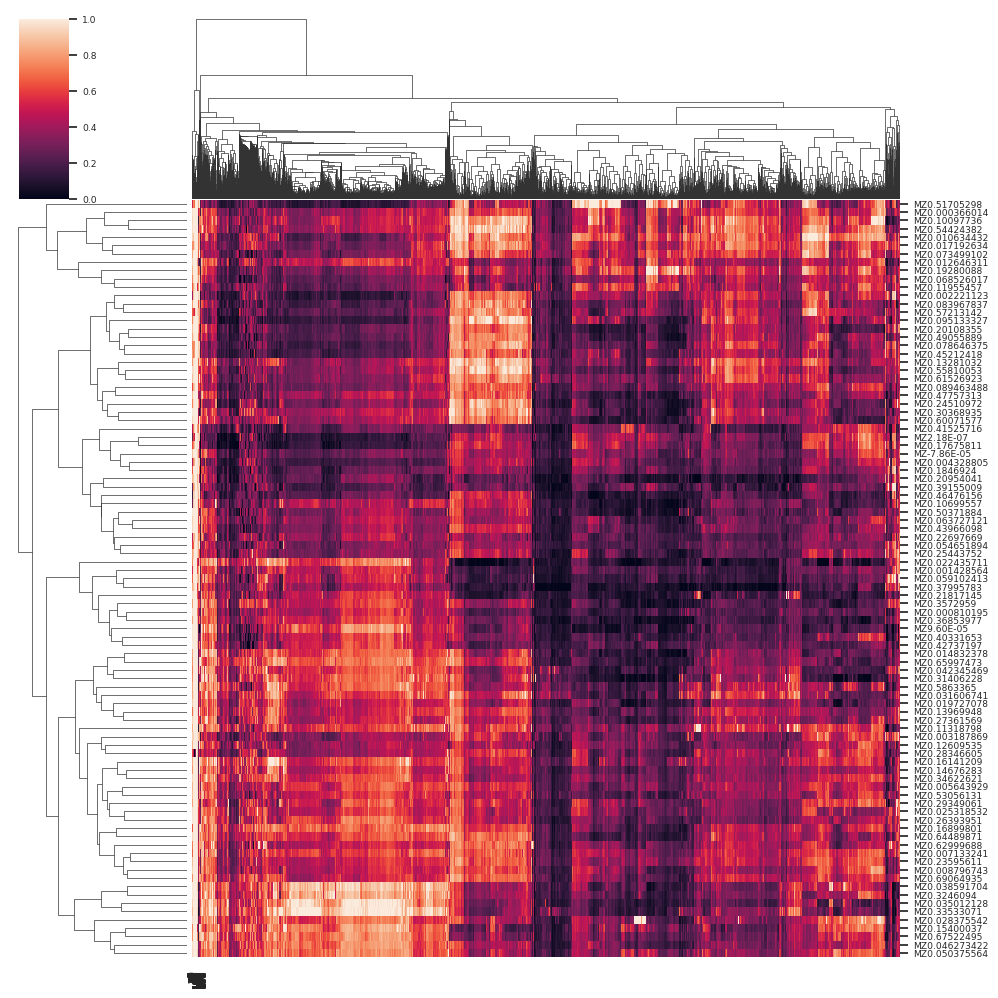

In [92]:
df_vi_n=df[df['Class']=='Normal']
df_vi_n
sns.set(font_scale=0.6)
sns.clustermap(df_vi_n.iloc[:,:-1],xticklabels=df.index.values,yticklabels=df.columns.values[:-1])

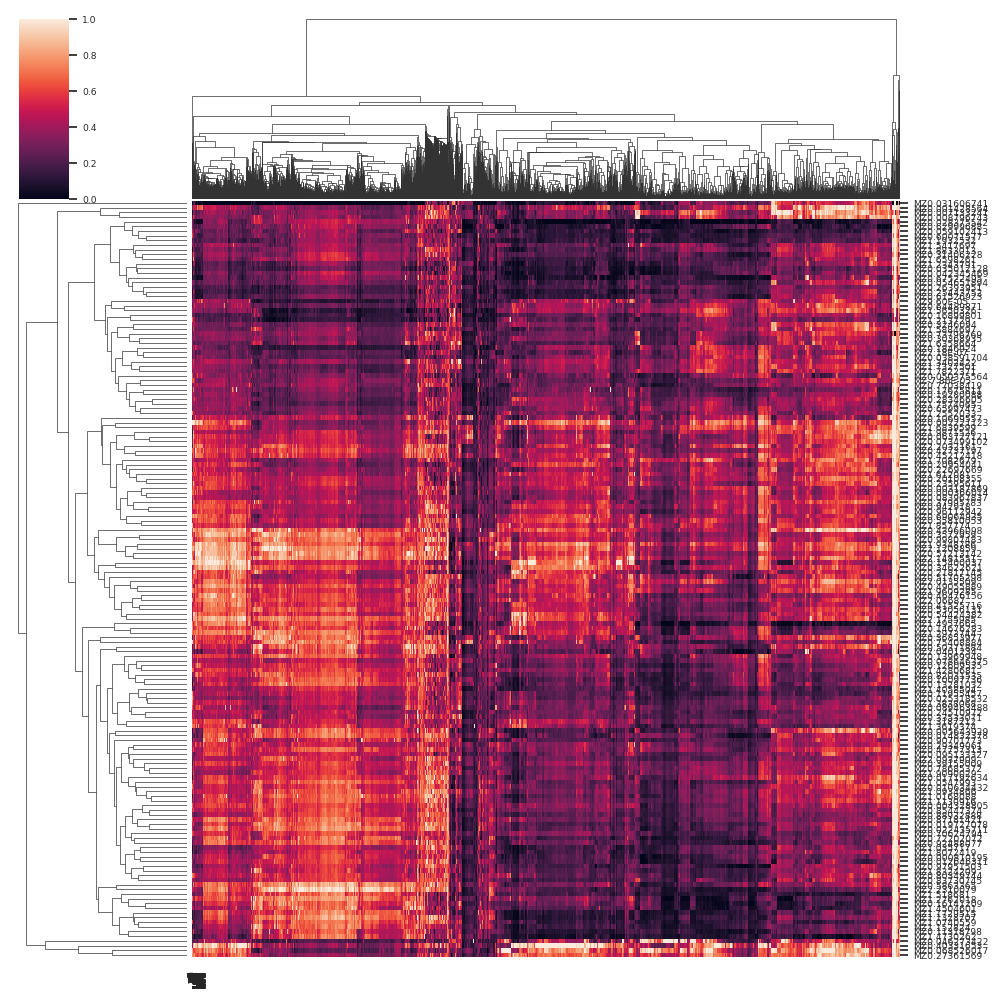

In [95]:
df_vi_n=df[df['Class']=='Cancer']
df_vi_n
sns.set(font_scale=0.6)
sns.clustermap(df_vi_n.iloc[:,:-1],xticklabels=df.index.values,yticklabels=df.columns.values[:-1])

In [80]:
df.columns.values[:-1]

array(['MZ-7.86E-05', 'MZ2.18E-07', 'MZ9.60E-05', ..., 'MZ19990.235',
       'MZ19992.874', 'MZ19995.513'], dtype=object)

**MODEL**

In [70]:
y_raw = df['Class']
X_raw = df.drop('Class', axis=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0)

label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [72]:
def plot_confusion_matrix(cm, classes=label_encoder.classes_, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j] * 100, fmt) + "%",
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


ACC:       0.9868421052631579
Precision: 0.987090367428004
Recall:    0.9868421052631579
F1:        0.9867647843011784
AUC:       0.9791666666666667
MCC:       0.9696657013254847
              precision    recall  f1-score   support

           0     1.0000    0.9811    0.9905        53
           1     0.9583    1.0000    0.9787        23

    accuracy                         0.9868        76
   macro avg     0.9792    0.9906    0.9846        76
weighted avg     0.9874    0.9868    0.9869        76



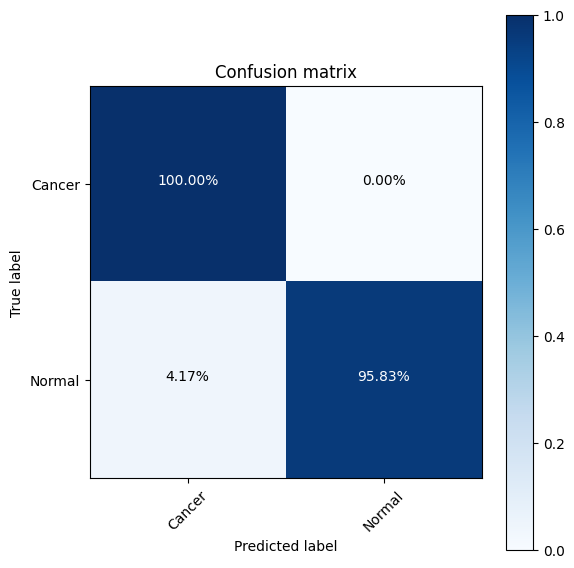

In [73]:
#RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

def result_metric(y_test, y_pred):
  # accuracy: (tp + tn) / (p + n)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("\nACC:       {}".format(accuracy))

  # precision tp / (tp + fp)
  precision = metrics.precision_score(y_test, y_pred, average='weighted')
  print("Precision: {}".format(precision))

  # recall: tp / (tp + fn)
  recall = metrics.recall_score(y_test, y_pred, average='weighted')
  print("Recall:    {}".format(recall))

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = metrics.f1_score(y_test, y_pred, average='weighted')
  print("F1:        {}".format(f1))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
  auc_score = metrics.auc(fpr, tpr)
  print("AUC:       {}".format(auc_score))

  mcc_score = metrics.matthews_corrcoef(y_test, y_pred)
  print("MCC:       {}".format(metrics.matthews_corrcoef(y_test, y_pred)))

  print(metrics.classification_report(y_pred, y_test, digits=4))

  cm = confusion_matrix(y_test, y_pred)
  cm
  plot_confusion_matrix(cm)

result_metric(y_test, y_pred)

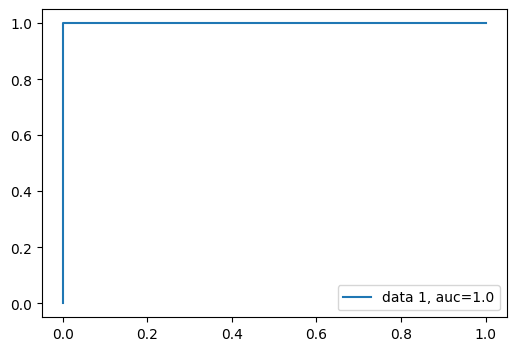

In [74]:
def roc_vi(clf,X_test,y_test):
  y_pred_proba = clf.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  rcParams['figure.figsize'] =6,4
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()
roc_vi(clf,X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



ACC:       1.0
Precision: 1.0
Recall:    1.0
F1:        1.0
AUC:       1.0
MCC:       1.0
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        52
           1     1.0000    1.0000    1.0000        24

    accuracy                         1.0000        76
   macro avg     1.0000    1.0000    1.0000        76
weighted avg     1.0000    1.0000    1.0000        76



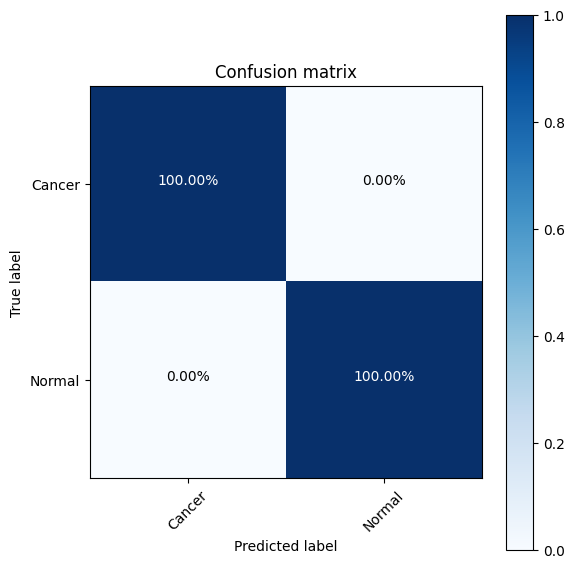

In [75]:
#LogisticRegression:
clf = LogisticRegression(random_state=0)
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

result_metric(y_test, y_pred)

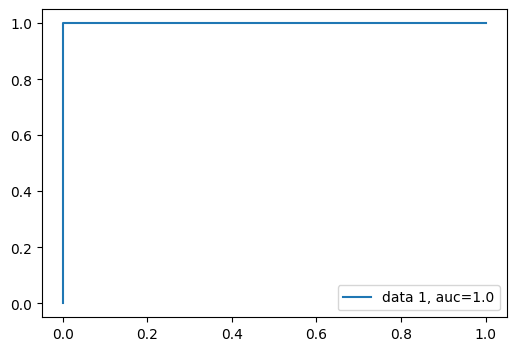

In [76]:
roc_vi(clf,X_test,y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

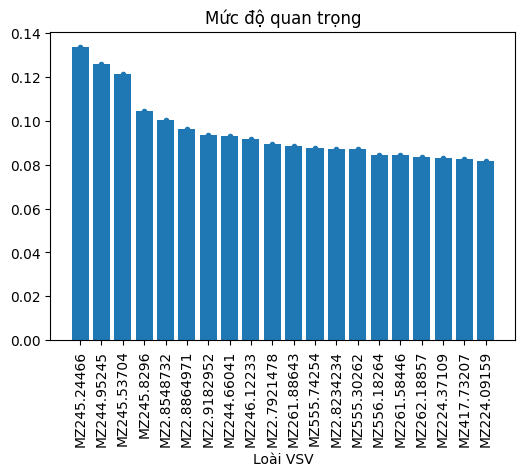

In [77]:
feature_names = X_train.columns.tolist()
feature_score = clf.coef_[0].tolist()

list_feature = dict.fromkeys(feature_names)

for i, key in enumerate(list_feature):
    list_feature[key] = feature_score[i]
list_feature

list_feature = dict(sorted(list_feature.items(), key=lambda item: item[1], reverse=True))
top_30 = dict(list(list_feature.items())[0: 20])
top_30

data = top_30
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)

plt.errorbar(names,values, linestyle='None', marker='.')

plt.title('Mức độ quan trọng')
plt.xlabel('Loài VSV')
plt.xticks(rotation = 90)

plt.show

In [60]:
names

['MZ245.24466', 'MZ244.95245', 'MZ245.53704', 'MZ245.8296', 'MZ2.8548732']

In [62]:
df_select=df[names]

y_raw = df['Class']
X_raw = df_select

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0)

label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)


ACC:       0.9736842105263158
Precision: 0.9746588693957116
Recall:    0.9736842105263158
F1:        0.9733603903112993
AUC:       0.9583333333333333
MCC:       0.9395296958493202
              precision    recall  f1-score   support

           0     1.0000    0.9630    0.9811        54
           1     0.9167    1.0000    0.9565        22

    accuracy                         0.9737        76
   macro avg     0.9583    0.9815    0.9688        76
weighted avg     0.9759    0.9737    0.9740        76



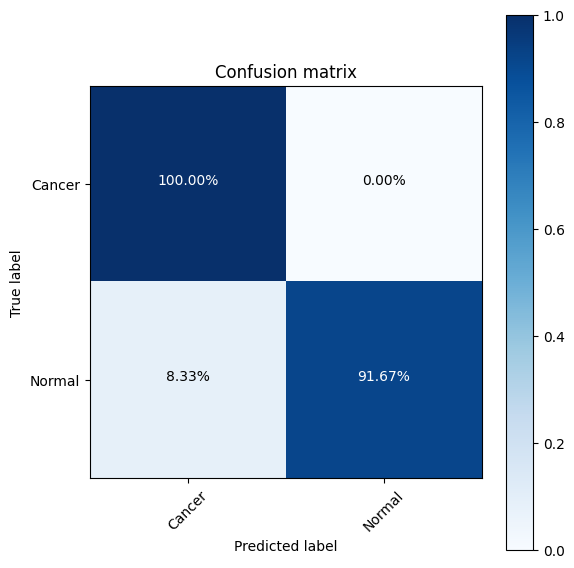

In [63]:
#LogisticRegression:
clf = LogisticRegression(random_state=0)
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

result_metric(y_test, y_pred)

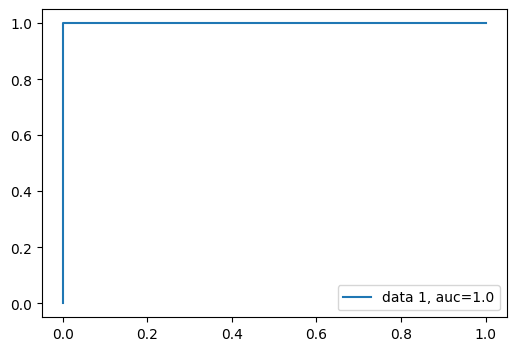

In [64]:
roc_vi(clf,X_test,y_test)